In [1]:
import gym
from gym import spaces
from maze_env import Maze
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines.common.env_checker import check_env
from stable_baselines.bench import Monitor
from stable_baselines import DQN,A2C

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
TK_SILENCE_DEPRECATION=1

In [3]:
class MazeGym(gym.Env):
    metadata = {'render.modes': ['human']}
    def __init__(self,task):
        self.first = 0
        self.agentXY = [0,0]
        self.goalXY = [4,4]
        walls,pits = self.mazeInfo(task)
        self.env = Maze(self.agentXY, self.goalXY, walls, pits)
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(low=5,high=395,shape=(4,))
        self.counter = 0
        self.max_steps = 300
    
    def mazeInfo(self, task):
        if task == 0:
            wall_shape=np.array([[2,2],[3,6]])
            pits=np.array([[6,3],[1,4]])
        elif task == 1:
            wall_shape=np.array([[6,2],[5,2],[4,2],[3,2],[2,2],[6,3],[6,4],[6,5],[2,3],[2,4],[2,5]])
            pits=[]
        elif task == 2:
            wall_shape=np.array([[6,3],[6,3],[6,2],[5,2],[4,2],[3,2],[3,3],[3,4],[3,5],[3,6],[4,6],[5,6],[5,7],[7,3]])
            pits=np.array([[1,3],[0,5], [7,7], [8,5]])
        return wall_shape, pits

    def step(self,action):
        self.counter += 1
        s_,r,d = self.env.step(action)
        if (self.counter == self.max_steps):
            self.counter = 0
            d = True
        return np.array(s_),r,d,{}

    def reset(self):
        state = np.array(self.env.reset(value=self.first))
        self.first = 1
        return state

    def render(self,mode='human'):
        self.env.render()

In [4]:
i = 1 # represents which task we will run
env = MazeGym(task=i)
env = Monitor(env=env, filename=None)
model = DQN('MlpPolicy', env, verbose=1, learning_rate=0.005) # pick your algorithm from stable baselines
rewards = []







Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [5]:
env2 = MazeGym(task=i)
env2 = Monitor(env2, filename=None)
model2 = A2C('MlpPolicy', env2, verbose=1)
rewards2 = []

Wrapping the env in a DummyVecEnv.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
while (len(rewards) < 2000):
    print("Length of Rewards for DQN: {}".format(len(rewards)))
    model.learn(total_timesteps=10000)
    rewards = env.get_episode_rewards()

while (len(rewards2) < 2000):
    print("Length of Rewards for A2C: {}".format(len(rewards2)))
    model2.learn(total_timesteps=10000)
    rewards2 = env2.get_episode_rewards()

Length of Rewards for DQN: 0
Length of Rewards for DQN: 33
Length of Rewards for DQN: 66
Length of Rewards for DQN: 101
Length of Rewards for DQN: 134
Length of Rewards for DQN: 168
Length of Rewards for DQN: 203
Length of Rewards for DQN: 236
Length of Rewards for DQN: 269
Length of Rewards for DQN: 305
Length of Rewards for DQN: 339
Length of Rewards for DQN: 372
Length of Rewards for DQN: 406
Length of Rewards for DQN: 440
Length of Rewards for DQN: 474
Length of Rewards for DQN: 509
Length of Rewards for DQN: 542
Length of Rewards for DQN: 575
Length of Rewards for DQN: 613
Length of Rewards for DQN: 646
Length of Rewards for DQN: 679
Length of Rewards for DQN: 714
Length of Rewards for DQN: 747
Length of Rewards for DQN: 780
Length of Rewards for DQN: 814
Length of Rewards for DQN: 847
Length of Rewards for DQN: 880
Length of Rewards for DQN: 914
Length of Rewards for DQN: 948
Length of Rewards for DQN: 981
Length of Rewards for DQN: 1015
Length of Rewards for DQN: 1048
Length of 

---------------------------------
| ep_len_mean        | 245      |
| ep_reward_mean     | -25.7    |
| explained_variance | 0.0419   |
| fps                | 695      |
| nupdates           | 1900     |
| policy_entropy     | 1.31     |
| total_timesteps    | 9500     |
| value_loss         | 7.67e-07 |
---------------------------------
----------------------------------
| ep_len_mean        | 248       |
| ep_reward_mean     | -26       |
| explained_variance | -2.38e+03 |
| fps                | 695       |
| nupdates           | 2000      |
| policy_entropy     | 1.32      |
| total_timesteps    | 10000     |
| value_loss         | 2.85e-05  |
----------------------------------
Length of Rewards for A2C: 40
---------------------------------
| ep_len_mean        | 248      |
| ep_reward_mean     | -26      |
| explained_variance | -696     |
| fps                | 1236     |
| nupdates           | 1        |
| policy_entropy     | 1.21     |
| total_timesteps    | 5        |
| value_

----------------------------------
| ep_len_mean        | 252       |
| ep_reward_mean     | -26.1     |
| explained_variance | -5.91e-05 |
| fps                | 716       |
| nupdates           | 100       |
| policy_entropy     | 1.37      |
| total_timesteps    | 500       |
| value_loss         | 5.25e-06  |
----------------------------------
----------------------------------
| ep_len_mean        | 253       |
| ep_reward_mean     | -26.2     |
| explained_variance | -4.27e-05 |
| fps                | 724       |
| nupdates           | 200       |
| policy_entropy     | 1.36      |
| total_timesteps    | 1000      |
| value_loss         | 95        |
----------------------------------
---------------------------------
| ep_len_mean        | 254      |
| ep_reward_mean     | -26.2    |
| explained_variance | -0.119   |
| fps                | 795      |
| nupdates           | 300      |
| policy_entropy     | 1.33     |
| total_timesteps    | 1500     |
| value_loss         | 7.1e-

---------------------------------
| ep_len_mean        | 277      |
| ep_reward_mean     | -28.3    |
| explained_variance | -0.188   |
| fps                | 851      |
| nupdates           | 400      |
| policy_entropy     | 1.31     |
| total_timesteps    | 2000     |
| value_loss         | 5.53e-09 |
---------------------------------
---------------------------------
| ep_len_mean        | 282      |
| ep_reward_mean     | -28.7    |
| explained_variance | 0.00866  |
| fps                | 826      |
| nupdates           | 500      |
| policy_entropy     | 1.39     |
| total_timesteps    | 2500     |
| value_loss         | 2.87e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 282      |
| ep_reward_mean     | -28.7    |
| explained_variance | 0.0269   |
| fps                | 808      |
| nupdates           | 600      |
| policy_entropy     | 1.26     |
| total_timesteps    | 3000     |
| value_loss         | 94.2     |
--------------

---------------------------------
| ep_len_mean        | 282      |
| ep_reward_mean     | -28.7    |
| explained_variance | 3.1e-06  |
| fps                | 776      |
| nupdates           | 700      |
| policy_entropy     | 1.16     |
| total_timesteps    | 3500     |
| value_loss         | 90.9     |
---------------------------------
---------------------------------
| ep_len_mean        | 282      |
| ep_reward_mean     | -28.7    |
| explained_variance | 0.0544   |
| fps                | 794      |
| nupdates           | 800      |
| policy_entropy     | 1.32     |
| total_timesteps    | 4000     |
| value_loss         | 4.06e-08 |
---------------------------------
---------------------------------
| ep_len_mean        | 282      |
| ep_reward_mean     | -28.7    |
| explained_variance | -228     |
| fps                | 782      |
| nupdates           | 900      |
| policy_entropy     | 1.2      |
| total_timesteps    | 4500     |
| value_loss         | 0.000779 |
--------------

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.124    |
| fps                | 801      |
| nupdates           | 1000     |
| policy_entropy     | 1.36     |
| total_timesteps    | 5000     |
| value_loss         | 5.79e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -0.0345  |
| fps                | 792      |
| nupdates           | 1100     |
| policy_entropy     | 1.21     |
| total_timesteps    | 5500     |
| value_loss         | 94.7     |
---------------------------------
---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30.1    |
| explained_variance | 0.00748  |
| fps                | 785      |
| nupdates           | 1200     |
| policy_entropy     | 1.37     |
| total_timesteps    | 6000     |
| value_loss         | 5.83e-07 |
--------------

---------------------------------
| ep_len_mean        | 276      |
| ep_reward_mean     | -27.9    |
| explained_variance | -3.25    |
| fps                | 695      |
| nupdates           | 1300     |
| policy_entropy     | 1.39     |
| total_timesteps    | 6500     |
| value_loss         | 2.09e-08 |
---------------------------------
---------------------------------
| ep_len_mean        | 268      |
| ep_reward_mean     | -27.1    |
| explained_variance | -2.6e+03 |
| fps                | 656      |
| nupdates           | 1400     |
| policy_entropy     | 1.26     |
| total_timesteps    | 7000     |
| value_loss         | 0.00112  |
---------------------------------
---------------------------------
| ep_len_mean        | 267      |
| ep_reward_mean     | -27      |
| explained_variance | -0.0956  |
| fps                | 657      |
| nupdates           | 1500     |
| policy_entropy     | 1.35     |
| total_timesteps    | 7500     |
| value_loss         | 92.8     |
--------------

---------------------------------
| ep_len_mean        | 255      |
| ep_reward_mean     | -25.8    |
| explained_variance | 0.000184 |
| fps                | 764      |
| nupdates           | 1600     |
| policy_entropy     | 1.33     |
| total_timesteps    | 8000     |
| value_loss         | 94.3     |
---------------------------------
---------------------------------
| ep_len_mean        | 255      |
| ep_reward_mean     | -25.8    |
| explained_variance | -3.21    |
| fps                | 775      |
| nupdates           | 1700     |
| policy_entropy     | 1.38     |
| total_timesteps    | 8500     |
| value_loss         | 4.95e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 255      |
| ep_reward_mean     | -25.8    |
| explained_variance | -354     |
| fps                | 771      |
| nupdates           | 1800     |
| policy_entropy     | 1.37     |
| total_timesteps    | 9000     |
| value_loss         | 0.000398 |
--------------

---------------------------------
| ep_len_mean        | 255      |
| ep_reward_mean     | -25.9    |
| explained_variance | -10.4    |
| fps                | 771      |
| nupdates           | 1900     |
| policy_entropy     | 1.29     |
| total_timesteps    | 9500     |
| value_loss         | 1.76e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 255      |
| ep_reward_mean     | -25.9    |
| explained_variance | -0.00017 |
| fps                | 769      |
| nupdates           | 2000     |
| policy_entropy     | 1.3      |
| total_timesteps    | 10000    |
| value_loss         | 94.2     |
---------------------------------
Length of Rewards for A2C: 329
---------------------------------
| ep_len_mean        | 255      |
| ep_reward_mean     | -25.9    |
| explained_variance | -45.8    |
| fps                | 1391     |
| nupdates           | 1        |
| policy_entropy     | 1.3      |
| total_timesteps    | 5        |
| value_loss     

----------------------------------
| ep_len_mean        | 294       |
| ep_reward_mean     | -29.8     |
| explained_variance | -2.87e-05 |
| fps                | 728       |
| nupdates           | 100       |
| policy_entropy     | 1.33      |
| total_timesteps    | 500       |
| value_loss         | 93.1      |
----------------------------------
---------------------------------
| ep_len_mean        | 294      |
| ep_reward_mean     | -29.8    |
| explained_variance | -12.4    |
| fps                | 853      |
| nupdates           | 200      |
| policy_entropy     | 1.33     |
| total_timesteps    | 1000     |
| value_loss         | 4.59e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 294      |
| ep_reward_mean     | -29.8    |
| explained_variance | -36.5    |
| fps                | 804      |
| nupdates           | 300      |
| policy_entropy     | 1.31     |
| total_timesteps    | 1500     |
| value_loss         | 8.44e-05 |
----

---------------------------------
| ep_len_mean        | 285      |
| ep_reward_mean     | -28.9    |
| explained_variance | -4.24    |
| fps                | 753      |
| nupdates           | 400      |
| policy_entropy     | 1.34     |
| total_timesteps    | 2000     |
| value_loss         | 5.34e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 285      |
| ep_reward_mean     | -28.9    |
| explained_variance | 7.75e-07 |
| fps                | 753      |
| nupdates           | 500      |
| policy_entropy     | 1.26     |
| total_timesteps    | 2500     |
| value_loss         | 93.8     |
---------------------------------
---------------------------------
| ep_len_mean        | 285      |
| ep_reward_mean     | -28.9    |
| explained_variance | -1.62    |
| fps                | 790      |
| nupdates           | 600      |
| policy_entropy     | 1.25     |
| total_timesteps    | 3000     |
| value_loss         | 3.35e-05 |
--------------

---------------------------------
| ep_len_mean        | 288      |
| ep_reward_mean     | -29.1    |
| explained_variance | 1.96e-05 |
| fps                | 792      |
| nupdates           | 700      |
| policy_entropy     | 1.25     |
| total_timesteps    | 3500     |
| value_loss         | 8.21e-07 |
---------------------------------
---------------------------------
| ep_len_mean        | 288      |
| ep_reward_mean     | -29.1    |
| explained_variance | -78.8    |
| fps                | 779      |
| nupdates           | 800      |
| policy_entropy     | 1.2      |
| total_timesteps    | 4000     |
| value_loss         | 0.000128 |
---------------------------------
---------------------------------
| ep_len_mean        | 288      |
| ep_reward_mean     | -29.1    |
| explained_variance | 0.000167 |
| fps                | 768      |
| nupdates           | 900      |
| policy_entropy     | 1.19     |
| total_timesteps    | 4500     |
| value_loss         | 94.4     |
--------------

---------------------------------
| ep_len_mean        | 291      |
| ep_reward_mean     | -29.5    |
| explained_variance | 0.0171   |
| fps                | 771      |
| nupdates           | 1000     |
| policy_entropy     | 1.24     |
| total_timesteps    | 5000     |
| value_loss         | 94.8     |
---------------------------------
---------------------------------
| ep_len_mean        | 291      |
| ep_reward_mean     | -29.5    |
| explained_variance | -0.481   |
| fps                | 787      |
| nupdates           | 1100     |
| policy_entropy     | 1.28     |
| total_timesteps    | 5500     |
| value_loss         | 1.42e-07 |
---------------------------------
---------------------------------
| ep_len_mean        | 291      |
| ep_reward_mean     | -29.5    |
| explained_variance | 0.458    |
| fps                | 782      |
| nupdates           | 1200     |
| policy_entropy     | 1.28     |
| total_timesteps    | 6000     |
| value_loss         | 2.05e-06 |
--------------

----------------------------------
| ep_len_mean        | 291       |
| ep_reward_mean     | -29.5     |
| explained_variance | -1.34e+04 |
| fps                | 793       |
| nupdates           | 1300      |
| policy_entropy     | 1.32      |
| total_timesteps    | 6500      |
| value_loss         | 0.000293  |
----------------------------------
----------------------------------
| ep_len_mean        | 291       |
| ep_reward_mean     | -29.5     |
| explained_variance | -0.000155 |
| fps                | 789       |
| nupdates           | 1400      |
| policy_entropy     | 1.33      |
| total_timesteps    | 7000      |
| value_loss         | 99.2      |
----------------------------------
---------------------------------
| ep_len_mean        | 291      |
| ep_reward_mean     | -29.5    |
| explained_variance | 0.00652  |
| fps                | 801      |
| nupdates           | 1500     |
| policy_entropy     | 1.26     |
| total_timesteps    | 7500     |
| value_loss         | 2.44e

---------------------------------
| ep_len_mean        | 291      |
| ep_reward_mean     | -29.5    |
| explained_variance | -6.07    |
| fps                | 800      |
| nupdates           | 1600     |
| policy_entropy     | 1.31     |
| total_timesteps    | 8000     |
| value_loss         | 3.85e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 291      |
| ep_reward_mean     | -29.5    |
| explained_variance | -23.4    |
| fps                | 796      |
| nupdates           | 1700     |
| policy_entropy     | 1.32     |
| total_timesteps    | 8500     |
| value_loss         | 6.86e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 291      |
| ep_reward_mean     | -29.5    |
| explained_variance | 2.98e-07 |
| fps                | 791      |
| nupdates           | 1800     |
| policy_entropy     | 1.36     |
| total_timesteps    | 9000     |
| value_loss         | 95.4     |
--------------

----------------------------------
| ep_len_mean        | 297       |
| ep_reward_mean     | -30.1     |
| explained_variance | -8.76e-05 |
| fps                | 779       |
| nupdates           | 1900      |
| policy_entropy     | 1.35      |
| total_timesteps    | 9500      |
| value_loss         | 94        |
----------------------------------
---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30.1    |
| explained_variance | 0.232    |
| fps                | 786      |
| nupdates           | 2000     |
| policy_entropy     | 1.32     |
| total_timesteps    | 10000    |
| value_loss         | 0.000541 |
---------------------------------
Length of Rewards for A2C: 603
---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30.1    |
| explained_variance | -28.1    |
| fps                | 1401     |
| nupdates           | 1        |
| policy_entropy     | 1.23     |
| total_timesteps    | 5        |
| value

---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30.1    |
| explained_variance | 0.0297   |
| fps                | 975      |
| nupdates           | 100      |
| policy_entropy     | 1.34     |
| total_timesteps    | 500      |
| value_loss         | 2.27e-07 |
---------------------------------
---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30.1    |
| explained_variance | -14.3    |
| fps                | 811      |
| nupdates           | 200      |
| policy_entropy     | 1.38     |
| total_timesteps    | 1000     |
| value_loss         | 0.00187  |
---------------------------------
---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30.1    |
| explained_variance | -0.00316 |
| fps                | 771      |
| nupdates           | 300      |
| policy_entropy     | 1.31     |
| total_timesteps    | 1500     |
| value_loss         | 96.7     |
--------------

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.00699  |
| fps                | 749      |
| nupdates           | 400      |
| policy_entropy     | 1.22     |
| total_timesteps    | 2000     |
| value_loss         | 88.2     |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.474    |
| fps                | 785      |
| nupdates           | 500      |
| policy_entropy     | 1.34     |
| total_timesteps    | 2500     |
| value_loss         | 1.3e-06  |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.00535  |
| fps                | 768      |
| nupdates           | 600      |
| policy_entropy     | 1.35     |
| total_timesteps    | 3000     |
| value_loss         | 6.85e-06 |
--------------

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.000244 |
| fps                | 776      |
| nupdates           | 800      |
| policy_entropy     | 1.28     |
| total_timesteps    | 4000     |
| value_loss         | 94.3     |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -28.7    |
| fps                | 796      |
| nupdates           | 900      |
| policy_entropy     | 1.31     |
| total_timesteps    | 4500     |
| value_loss         | 1.4e-05  |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -21.1    |
| fps                | 791      |
| nupdates           | 1000     |
| policy_entropy     | 1.36     |
| total_timesteps    | 5000     |
| value_loss         | 0.000118 |
--------------

----------------------------------
| ep_len_mean        | 300       |
| ep_reward_mean     | -30.3     |
| explained_variance | -2.38e+03 |
| fps                | 821       |
| nupdates           | 1100      |
| policy_entropy     | 1.3       |
| total_timesteps    | 5500      |
| value_loss         | 2.24e-05  |
----------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | 0.012    |
| fps                | 813      |
| nupdates           | 1200     |
| policy_entropy     | 1.35     |
| total_timesteps    | 6000     |
| value_loss         | 95.1     |
---------------------------------
----------------------------------
| ep_len_mean        | 300       |
| ep_reward_mean     | -30.3     |
| explained_variance | -3.44e+03 |
| fps                | 828       |
| nupdates           | 1300      |
| policy_entropy     | 1.34      |
| total_timesteps    | 6500      |
| value_loss         | 7.85e-0

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -6.99    |
| fps                | 818      |
| nupdates           | 1400     |
| policy_entropy     | 1.34     |
| total_timesteps    | 7000     |
| value_loss         | 1.43e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -3.36    |
| fps                | 812      |
| nupdates           | 1500     |
| policy_entropy     | 1.35     |
| total_timesteps    | 7500     |
| value_loss         | 2.02e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -0.00153 |
| fps                | 808      |
| nupdates           | 1600     |
| policy_entropy     | 1.34     |
| total_timesteps    | 8000     |
| value_loss         | 94.1     |
--------------

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | 7.8e-05  |
| fps                | 804      |
| nupdates           | 1700     |
| policy_entropy     | 1.36     |
| total_timesteps    | 8500     |
| value_loss         | 94.1     |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -0.00645 |
| fps                | 814      |
| nupdates           | 1800     |
| policy_entropy     | 1.38     |
| total_timesteps    | 9000     |
| value_loss         | 8e-07    |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -180     |
| fps                | 809      |
| nupdates           | 1900     |
| policy_entropy     | 1.28     |
| total_timesteps    | 9500     |
| value_loss         | 1.55e-05 |
--------------

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -0.589   |
| fps                | 821      |
| nupdates           | 2000     |
| policy_entropy     | 1.26     |
| total_timesteps    | 10000    |
| value_loss         | 3.02e-06 |
---------------------------------
Length of Rewards for A2C: 870
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -98.9    |
| fps                | 1502     |
| nupdates           | 1        |
| policy_entropy     | 1.25     |
| total_timesteps    | 5        |
| value_loss         | 0.000162 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | 0.0848   |
| fps                | 743      |
| nupdates           | 100      |
| policy_entropy     | 1.24     |
| total_timesteps    | 500      |
| value_loss     

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -0.0213  |
| fps                | 737      |
| nupdates           | 200      |
| policy_entropy     | 1.27     |
| total_timesteps    | 1000     |
| value_loss         | 97.4     |
---------------------------------
----------------------------------
| ep_len_mean        | 300       |
| ep_reward_mean     | -30.3     |
| explained_variance | -7.45e+03 |
| fps                | 818       |
| nupdates           | 300       |
| policy_entropy     | 1.29      |
| total_timesteps    | 1500      |
| value_loss         | 6.93e-06  |
----------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -539     |
| fps                | 790      |
| nupdates           | 400      |
| policy_entropy     | 1.3      |
| total_timesteps    | 2000     |
| value_loss         | 0.000118 |
----

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -0.883   |
| fps                | 835      |
| nupdates           | 500      |
| policy_entropy     | 1.38     |
| total_timesteps    | 2500     |
| value_loss         | 7.67e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -0.0113  |
| fps                | 817      |
| nupdates           | 600      |
| policy_entropy     | 1.25     |
| total_timesteps    | 3000     |
| value_loss         | 98.4     |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -35      |
| fps                | 845      |
| nupdates           | 700      |
| policy_entropy     | 1.29     |
| total_timesteps    | 3500     |
| value_loss         | 1.17e-06 |
--------------

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -1.91    |
| fps                | 807      |
| nupdates           | 900      |
| policy_entropy     | 1.29     |
| total_timesteps    | 4500     |
| value_loss         | 1.45e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -0.0055  |
| fps                | 799      |
| nupdates           | 1000     |
| policy_entropy     | 1.38     |
| total_timesteps    | 5000     |
| value_loss         | 94.3     |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | 0.134    |
| fps                | 817      |
| nupdates           | 1100     |
| policy_entropy     | 1.38     |
| total_timesteps    | 5500     |
| value_loss         | 4e-06    |
--------------

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -0.194   |
| fps                | 803      |
| nupdates           | 1200     |
| policy_entropy     | 1.37     |
| total_timesteps    | 6000     |
| value_loss         | 1.47e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -13.1    |
| fps                | 796      |
| nupdates           | 1300     |
| policy_entropy     | 1.33     |
| total_timesteps    | 6500     |
| value_loss         | 1.78e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -0.0264  |
| fps                | 790      |
| nupdates           | 1400     |
| policy_entropy     | 1.21     |
| total_timesteps    | 7000     |
| value_loss         | 91.5     |
--------------

----------------------------------
| ep_len_mean        | 300       |
| ep_reward_mean     | -30.4     |
| explained_variance | -0.000263 |
| fps                | 799       |
| nupdates           | 1500      |
| policy_entropy     | 1.29      |
| total_timesteps    | 7500      |
| value_loss         | 94.8      |
----------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 3.93e-06 |
| fps                | 809      |
| nupdates           | 1600     |
| policy_entropy     | 1.29     |
| total_timesteps    | 8000     |
| value_loss         | 6.16e-07 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -7.58    |
| fps                | 803      |
| nupdates           | 1700     |
| policy_entropy     | 1.3      |
| total_timesteps    | 8500     |
| value_loss         | 1.73e-06 |
----

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -41.9    |
| fps                | 796      |
| nupdates           | 1800     |
| policy_entropy     | 1.21     |
| total_timesteps    | 9000     |
| value_loss         | 3.2e-05  |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.0165   |
| fps                | 792      |
| nupdates           | 1900     |
| policy_entropy     | 1.24     |
| total_timesteps    | 9500     |
| value_loss         | 94.7     |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -54      |
| fps                | 802      |
| nupdates           | 2000     |
| policy_entropy     | 1.3      |
| total_timesteps    | 10000    |
| value_loss         | 1.61e-05 |
--------------

Length of Rewards for A2C: 1137
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -56.1    |
| fps                | 611      |
| nupdates           | 1        |
| policy_entropy     | 1.32     |
| total_timesteps    | 5        |
| value_loss         | 0.00144  |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -57.5    |
| fps                | 1034     |
| nupdates           | 100      |
| policy_entropy     | 1.24     |
| total_timesteps    | 500      |
| value_loss         | 0.00011  |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.00428  |
| fps                | 848      |
| nupdates           | 200      |
| policy_entropy     | 1.35     |
| total_timesteps    | 1000     |
| value_loss    

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -9.02    |
| fps                | 814      |
| nupdates           | 300      |
| policy_entropy     | 1.26     |
| total_timesteps    | 1500     |
| value_loss         | 9.03e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -0.00932 |
| fps                | 791      |
| nupdates           | 400      |
| policy_entropy     | 1.32     |
| total_timesteps    | 2000     |
| value_loss         | 95       |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -6.2     |
| fps                | 833      |
| nupdates           | 500      |
| policy_entropy     | 1.33     |
| total_timesteps    | 2500     |
| value_loss         | 4.18e-06 |
--------------

---------------------------------
| ep_len_mean        | 294      |
| ep_reward_mean     | -29.7    |
| explained_variance | -0.328   |
| fps                | 796      |
| nupdates           | 600      |
| policy_entropy     | 1.29     |
| total_timesteps    | 3000     |
| value_loss         | 7.01e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 294      |
| ep_reward_mean     | -29.7    |
| explained_variance | -0.00118 |
| fps                | 783      |
| nupdates           | 700      |
| policy_entropy     | 1.37     |
| total_timesteps    | 3500     |
| value_loss         | 2.67e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 294      |
| ep_reward_mean     | -29.7    |
| explained_variance | 0.00643  |
| fps                | 776      |
| nupdates           | 800      |
| policy_entropy     | 1.3      |
| total_timesteps    | 4000     |
| value_loss         | 93.7     |
--------------

---------------------------------
| ep_len_mean        | 294      |
| ep_reward_mean     | -29.7    |
| explained_variance | 0.0154   |
| fps                | 789      |
| nupdates           | 900      |
| policy_entropy     | 1.33     |
| total_timesteps    | 4500     |
| value_loss         | 95       |
---------------------------------
---------------------------------
| ep_len_mean        | 294      |
| ep_reward_mean     | -29.7    |
| explained_variance | 0.151    |
| fps                | 808      |
| nupdates           | 1000     |
| policy_entropy     | 1.37     |
| total_timesteps    | 5000     |
| value_loss         | 4.79e-07 |
---------------------------------
---------------------------------
| ep_len_mean        | 294      |
| ep_reward_mean     | -29.7    |
| explained_variance | -10.4    |
| fps                | 801      |
| nupdates           | 1100     |
| policy_entropy     | 1.36     |
| total_timesteps    | 5500     |
| value_loss         | 1.58e-06 |
--------------

---------------------------------
| ep_len_mean        | 291      |
| ep_reward_mean     | -29.5    |
| explained_variance | -19.5    |
| fps                | 787      |
| nupdates           | 1200     |
| policy_entropy     | 1.29     |
| total_timesteps    | 6000     |
| value_loss         | 5.29e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 291      |
| ep_reward_mean     | -29.5    |
| explained_variance | -0.0626  |
| fps                | 782      |
| nupdates           | 1300     |
| policy_entropy     | 1.26     |
| total_timesteps    | 6500     |
| value_loss         | 93.7     |
---------------------------------
---------------------------------
| ep_len_mean        | 293      |
| ep_reward_mean     | -29.7    |
| explained_variance | -34      |
| fps                | 793      |
| nupdates           | 1400     |
| policy_entropy     | 1.32     |
| total_timesteps    | 7000     |
| value_loss         | 8.52e-05 |
--------------

---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30.1    |
| explained_variance | -0.0869  |
| fps                | 805      |
| nupdates           | 1500     |
| policy_entropy     | 1.35     |
| total_timesteps    | 7500     |
| value_loss         | 3.5e-06  |
---------------------------------
---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30.1    |
| explained_variance | -2.12    |
| fps                | 800      |
| nupdates           | 1600     |
| policy_entropy     | 1.34     |
| total_timesteps    | 8000     |
| value_loss         | 1.09e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30.1    |
| explained_variance | 0.0123   |
| fps                | 796      |
| nupdates           | 1700     |
| policy_entropy     | 1.34     |
| total_timesteps    | 8500     |
| value_loss         | 94.3     |
--------------

---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30      |
| explained_variance | 0.000811 |
| fps                | 795      |
| nupdates           | 1800     |
| policy_entropy     | 1.39     |
| total_timesteps    | 9000     |
| value_loss         | 94.7     |
---------------------------------
---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30      |
| explained_variance | -0.0626  |
| fps                | 804      |
| nupdates           | 1900     |
| policy_entropy     | 1.37     |
| total_timesteps    | 9500     |
| value_loss         | 2.38e-07 |
---------------------------------
---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30      |
| explained_variance | -2.26    |
| fps                | 800      |
| nupdates           | 2000     |
| policy_entropy     | 1.36     |
| total_timesteps    | 10000    |
| value_loss         | 8.98e-06 |
--------------

Length of Rewards for A2C: 1406
----------------------------------
| ep_len_mean        | 300       |
| ep_reward_mean     | -30.4     |
| explained_variance | -4.64e+04 |
| fps                | 1654      |
| nupdates           | 1         |
| policy_entropy     | 1.33      |
| total_timesteps    | 5         |
| value_loss         | 9.87e-05  |
----------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -13.4    |
| fps                | 710      |
| nupdates           | 100      |
| policy_entropy     | 1.32     |
| total_timesteps    | 500      |
| value_loss         | 3.06e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -0.00212 |
| fps                | 726      |
| nupdates           | 200      |
| policy_entropy     | 1.27     |
| total_timesteps    | 1000     |
| valu

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.0108   |
| fps                | 820      |
| nupdates           | 300      |
| policy_entropy     | 1.38     |
| total_timesteps    | 1500     |
| value_loss         | 95.7     |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.0194   |
| fps                | 867      |
| nupdates           | 400      |
| policy_entropy     | 1.28     |
| total_timesteps    | 2000     |
| value_loss         | 0.008    |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -642     |
| fps                | 835      |
| nupdates           | 500      |
| policy_entropy     | 1.26     |
| total_timesteps    | 2500     |
| value_loss         | 0.000185 |
--------------

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.00288  |
| fps                | 809      |
| nupdates           | 600      |
| policy_entropy     | 1.37     |
| total_timesteps    | 3000     |
| value_loss         | 9.53e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 1.19e-05 |
| fps                | 798      |
| nupdates           | 700      |
| policy_entropy     | 1.37     |
| total_timesteps    | 3500     |
| value_loss         | 94.4     |
---------------------------------
----------------------------------
| ep_len_mean        | 300       |
| ep_reward_mean     | -30.4     |
| explained_variance | -1.08e+03 |
| fps                | 819       |
| nupdates           | 800       |
| policy_entropy     | 1.36      |
| total_timesteps    | 4000      |
| value_loss         | 1.8e-05   |
-----

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.021    |
| fps                | 798      |
| nupdates           | 900      |
| policy_entropy     | 1.37     |
| total_timesteps    | 4500     |
| value_loss         | 1.43e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -0.0729  |
| fps                | 785      |
| nupdates           | 1000     |
| policy_entropy     | 1.34     |
| total_timesteps    | 5000     |
| value_loss         | 1.09e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -0.012   |
| fps                | 768      |
| nupdates           | 1100     |
| policy_entropy     | 1.32     |
| total_timesteps    | 5500     |
| value_loss         | 93.7     |
--------------

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -0.0113  |
| fps                | 811      |
| nupdates           | 1200     |
| policy_entropy     | 1.17     |
| total_timesteps    | 6000     |
| value_loss         | 95.3     |
---------------------------------
----------------------------------
| ep_len_mean        | 300       |
| ep_reward_mean     | -30.4     |
| explained_variance | -0.000704 |
| fps                | 825       |
| nupdates           | 1300      |
| policy_entropy     | 1.38      |
| total_timesteps    | 6500      |
| value_loss         | 3.26e-06  |
----------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.638    |
| fps                | 817      |
| nupdates           | 1400     |
| policy_entropy     | 1.29     |
| total_timesteps    | 7000     |
| value_loss         | 8.94e-07 |
----

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.153    |
| fps                | 744      |
| nupdates           | 1500     |
| policy_entropy     | 1.32     |
| total_timesteps    | 7500     |
| value_loss         | 5.27e-07 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 1.79e-07 |
| fps                | 742      |
| nupdates           | 1600     |
| policy_entropy     | 1.33     |
| total_timesteps    | 8000     |
| value_loss         | 96       |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.206    |
| fps                | 755      |
| nupdates           | 1700     |
| policy_entropy     | 1.33     |
| total_timesteps    | 8500     |
| value_loss         | 7.74e-07 |
--------------

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.00729  |
| fps                | 808      |
| nupdates           | 1800     |
| policy_entropy     | 1.28     |
| total_timesteps    | 9000     |
| value_loss         | 2.94e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -37.6    |
| fps                | 803      |
| nupdates           | 1900     |
| policy_entropy     | 1.24     |
| total_timesteps    | 9500     |
| value_loss         | 0.000131 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.00428  |
| fps                | 798      |
| nupdates           | 2000     |
| policy_entropy     | 1.31     |
| total_timesteps    | 10000    |
| value_loss         | 94.2     |
--------------

Length of Rewards for A2C: 1673
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -0.0707  |
| fps                | 1515     |
| nupdates           | 1        |
| policy_entropy     | 1.26     |
| total_timesteps    | 5        |
| value_loss         | 2.66e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -0.026   |
| fps                | 738      |
| nupdates           | 100      |
| policy_entropy     | 1.31     |
| total_timesteps    | 500      |
| value_loss         | 93.9     |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -0.865   |
| fps                | 866      |
| nupdates           | 200      |
| policy_entropy     | 1.36     |
| total_timesteps    | 1000     |
| value_loss    

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | 0.242    |
| fps                | 778      |
| nupdates           | 300      |
| policy_entropy     | 1.29     |
| total_timesteps    | 1500     |
| value_loss         | 3.02e-07 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -7.97    |
| fps                | 766      |
| nupdates           | 400      |
| policy_entropy     | 1.25     |
| total_timesteps    | 2000     |
| value_loss         | 4.19e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | 0.000286 |
| fps                | 759      |
| nupdates           | 500      |
| policy_entropy     | 1.3      |
| total_timesteps    | 2500     |
| value_loss         | 94.4     |
--------------

---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30      |
| explained_variance | 0.0004   |
| fps                | 813      |
| nupdates           | 600      |
| policy_entropy     | 1.28     |
| total_timesteps    | 3000     |
| value_loss         | 95.2     |
---------------------------------
---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30      |
| explained_variance | 1.79e-07 |
| fps                | 836      |
| nupdates           | 700      |
| policy_entropy     | 1.26     |
| total_timesteps    | 3500     |
| value_loss         | 1.54e-05 |
---------------------------------
----------------------------------
| ep_len_mean        | 297       |
| ep_reward_mean     | -30       |
| explained_variance | -2.28e+03 |
| fps                | 819       |
| nupdates           | 800       |
| policy_entropy     | 1.32      |
| total_timesteps    | 4000      |
| value_loss         | 0.000594  |
-----

---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30      |
| explained_variance | 5.96e-08 |
| fps                | 813      |
| nupdates           | 900      |
| policy_entropy     | 1.28     |
| total_timesteps    | 4500     |
| value_loss         | 1.53e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30      |
| explained_variance | -3.1e-05 |
| fps                | 804      |
| nupdates           | 1000     |
| policy_entropy     | 1.33     |
| total_timesteps    | 5000     |
| value_loss         | 94.4     |
---------------------------------
---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30      |
| explained_variance | -0.00541 |
| fps                | 821      |
| nupdates           | 1100     |
| policy_entropy     | 1.37     |
| total_timesteps    | 5500     |
| value_loss         | 8.82e-07 |
--------------

---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30      |
| explained_variance | 0        |
| fps                | 793      |
| nupdates           | 1200     |
| policy_entropy     | 1.32     |
| total_timesteps    | 6000     |
| value_loss         | 7.78e-08 |
---------------------------------
---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -30      |
| explained_variance | 0.000656 |
| fps                | 785      |
| nupdates           | 1300     |
| policy_entropy     | 1.27     |
| total_timesteps    | 6500     |
| value_loss         | 3.82e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 297      |
| ep_reward_mean     | -29.9    |
| explained_variance | 0.0113   |
| fps                | 782      |
| nupdates           | 1400     |
| policy_entropy     | 1.38     |
| total_timesteps    | 7000     |
| value_loss         | 94.2     |
--------------

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | 0.0218   |
| fps                | 791      |
| nupdates           | 1500     |
| policy_entropy     | 1.26     |
| total_timesteps    | 7500     |
| value_loss         | 94.8     |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | 0.00903  |
| fps                | 797      |
| nupdates           | 1600     |
| policy_entropy     | 1.17     |
| total_timesteps    | 8000     |
| value_loss         | 7.66e-08 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | -0.00122 |
| fps                | 783      |
| nupdates           | 1700     |
| policy_entropy     | 1.19     |
| total_timesteps    | 8500     |
| value_loss         | 9.74e-06 |
--------------

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | 0        |
| fps                | 806      |
| nupdates           | 1800     |
| policy_entropy     | 1.3      |
| total_timesteps    | 9000     |
| value_loss         | 2.58e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | 1.79e-07 |
| fps                | 801      |
| nupdates           | 1900     |
| policy_entropy     | 1.29     |
| total_timesteps    | 9500     |
| value_loss         | 95.1     |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | 0.0226   |
| fps                | 811      |
| nupdates           | 2000     |
| policy_entropy     | 1.28     |
| total_timesteps    | 10000    |
| value_loss         | 1.11e-07 |
--------------

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | 0.00297  |
| fps                | 982      |
| nupdates           | 100      |
| policy_entropy     | 1.35     |
| total_timesteps    | 500      |
| value_loss         | 5.15e-05 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.3    |
| explained_variance | 1.41e-05 |
| fps                | 819      |
| nupdates           | 200      |
| policy_entropy     | 1.29     |
| total_timesteps    | 1000     |
| value_loss         | 4.06e-06 |
---------------------------------
----------------------------------
| ep_len_mean        | 300       |
| ep_reward_mean     | -30.3     |
| explained_variance | -1.14e-05 |
| fps                | 791       |
| nupdates           | 300       |
| policy_entropy     | 1.34      |
| total_timesteps    | 1500      |
| value_loss         | 95        |
-----

---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | 0.0507   |
| fps                | 762      |
| nupdates           | 400      |
| policy_entropy     | 1.24     |
| total_timesteps    | 2000     |
| value_loss         | 95.7     |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -30.9    |
| fps                | 806      |
| nupdates           | 500      |
| policy_entropy     | 1.32     |
| total_timesteps    | 2500     |
| value_loss         | 4.05e-06 |
---------------------------------
---------------------------------
| ep_len_mean        | 300      |
| ep_reward_mean     | -30.4    |
| explained_variance | -0.224   |
| fps                | 793      |
| nupdates           | 600      |
| policy_entropy     | 1.37     |
| total_timesteps    | 3000     |
| value_loss         | 1.76e-05 |
--------------

In [7]:
rewards = rewards[:2000]
rewards2 = rewards2[:2000]
episodes = len(rewards)

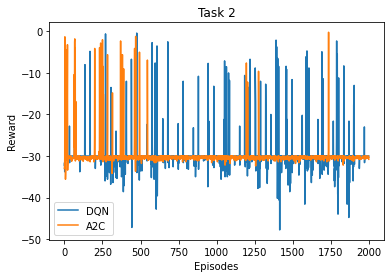

In [9]:
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Task {}".format(i+1))
plt.plot(list(range(episodes)),rewards, label='DQN')
plt.plot(list(range(episodes)),rewards2, label='A2C')
plt.legend()
plt.savefig("Task 2 A4")

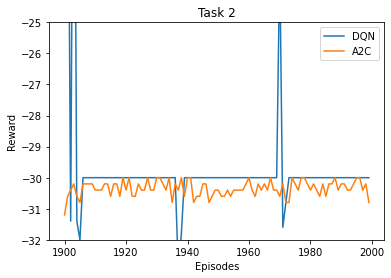

In [12]:
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Task {}".format(i+1))
plt.plot(list(range(episodes)[1900:]),rewards[1900:], label='DQN')
plt.plot(list(range(episodes)[1900:]),rewards2[1900:], label='A2C')
plt.ylim(bottom=-32,top=-25)
plt.legend()
plt.savefig("Task 2 A4 Last 100")

In [13]:
print(max(rewards))
print(max(rewards2))

-0.4
-0.2


In [14]:
print(np.var(rewards[1900:]))
print(np.var(rewards2[1900:]))

6.835259000000171
0.059884000000000964
